## 도수분포표

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [26]:
# 한글폰트 사용시 그래프에서 마이너스 폰트 깨지는 문제 해결
mpl.rcParams['axes.unicode_minus'] = False

In [3]:
df4 = pd.DataFrame(
    {
        'a': np.random.randn(1000) + 1,
        'b': np.random.randn(1000),
        'c': np.random.randn(1000) - 1
    },
    columns=['a', 'b', 'c'])
df4.head()

,a,b,c
0,1.029434,0.634707,0.001642
1,2.853511,-1.490254,-0.794746
2,0.090424,0.317297,-1.487709
3,-1.058758,0.054906,-3.286614
4,2.820757,-1.217262,-1.590888


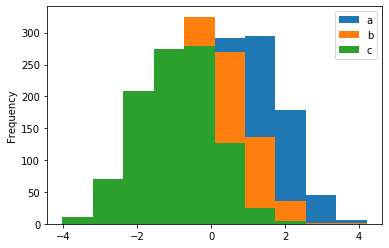

In [7]:
# alpha = 투명도
# 막대 하나를 bin 이라 하는데 기본적으로는 10개의 구간으로 그려냄

df4.plot.hist()

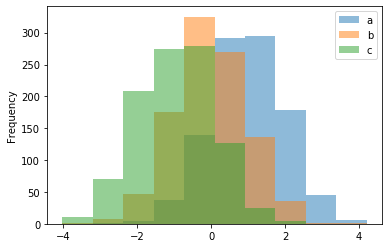

In [8]:
df4.plot.hist(alpha=0.5)

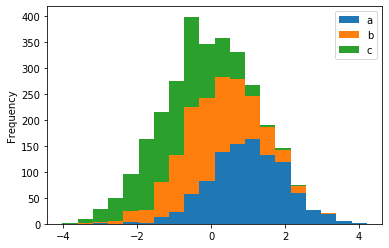

In [10]:
# bins 를 지정해서 20개의 구간으로 나오게 할 수 있음
# bins 값에 따라 세로축에 지정한 값도 달라지게 됨

df4.plot.hist(stacked=True, bins=20)

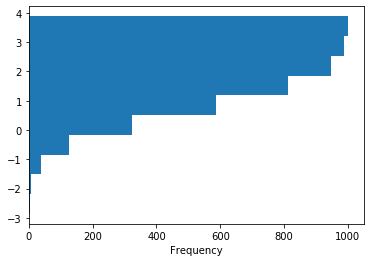

In [11]:
# 축 변경
# cumulative=True : 누적해서 그려줘

df4['a'].plot.hist(orientation='horizontal', cumulative=True)

* 파이썬 판다스로 차분 diff 값을 구하고 히스토그램으로 표현하기

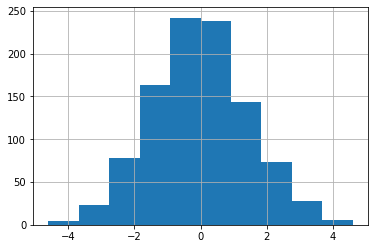

In [14]:
g = df4['a'].diff().hist()

In [18]:
# diff() : 현재값에서 이전값을 뺀 차이를 의미
# diff 가 무엇을 의미하는 지 알아보기 위한 코드임


df4['a_diff'] = df4['a'].diff()
df4['a_shift'] = df4['a'].shift(1)
df4['a_minus'] = df4['a'] - df4['a_shift']
df4[['a','a_shift','a_minus','a_diff']]

,a,a_shift,a_minus,a_diff
0,1.029434,NaN,NaN,NaN
1,2.853511,1.029434,1.824077,1.824077
2,0.090424,2.853511,-2.763087,-2.763087
3,-1.058758,0.090424,-1.149182,-1.149182
4,2.820757,-1.058758,3.879515,3.879515
...,...,...,...,...
995,-1.094047,0.517589,-1.611636,-1.611636
996,-0.444346,-1.094047,0.649700,0.649700
997,1.591980,-0.444346,2.036326,2.036326
998,1.785244,1.591980,0.193264,0.193264


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002124F4EE548>,
      dtype=object)

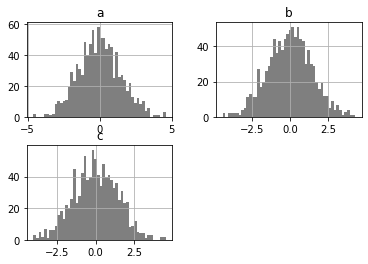

In [21]:
# 차분값을 이용해 a,b,c 컬럼 히스토그램 그리기

df4[['a','b','c']].diff().hist(color='k', alpha=0.5, bins=50)

####  카테고리 형태의 데이터
* 데이터가 카테고리 형태의 데이터라면 아래와 같이 hist 를 그릴 수 있다

In [23]:
# a 컬럼은 1000 까지의 숫자 중에서 랜덤으로 배정
# b 컬럼은 0~4 까지 데이터 배분

data = pd.DataFrame({
    'a': np.random.randn(1000),
    'b': np.random.randint(0, 4, 1000)
})

data.head()

,a,b
0,-0.093331,1
1,-0.955418,3
2,-1.060737,2
3,0.000125,0
4,-0.454355,2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002125038F888>,
      dtype=object)

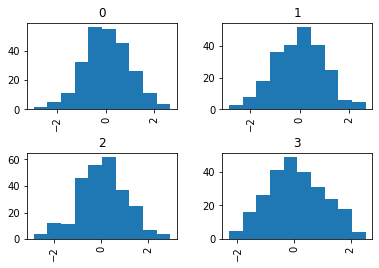

In [25]:
# 카테고리에 의한 히스토그램 그리기

data['a'].hist(by=data['b'], figsize=(6, 4))